In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [27]:
X,y = load_diabetes(return_X_y = True)

In [29]:
X.shape,y.shape

((442, 10), (442,))

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=45)

In [50]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [52]:
y_pred = lr.predict(X_test)

In [54]:
r2_score(y_test,y_pred)

0.5188113124539246

In [56]:
print(lr.coef_,lr.intercept_)

[  23.45465406 -247.42747406  492.1087518   329.35876431 -970.79723039
  573.54295519  182.42162368  255.92168168  794.21609282   89.32249214] 152.13623331746496


# scikit Learn Ridge

In [59]:
from sklearn.linear_model import Ridge

In [61]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

Ridge(alpha=0.001)

In [63]:
y_pred_ridge = ridge.predict(X_test)

In [65]:
r2_score(y_test,y_pred_ridge)

0.5201448351821767

In [67]:
print(ridge.coef_,ridge.intercept_)

[  24.01614407 -246.40604384  493.5928598   329.08832995 -852.76773624
  479.42466903  131.86682689  243.03291973  748.96464364   90.15508276] 152.12463296924477


# Do for random data

In [130]:
m = 100
X = 5* np.random.rand(m,1) - 2
y = 0.7* X**2 - 2 *X + 3 + 5*np.random.rand(m,1) 

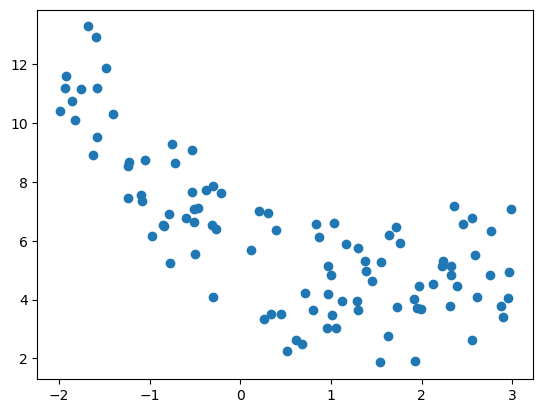

In [132]:
plt.scatter(X,y)
plt.show()

In [134]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [136]:
def getPredict(X,y,degree,alpha):
    model = Pipeline([
        ('PolyFeature',PolynomialFeatures(degree=degree)),
        ('Ridge',Ridge(alpha=alpha))
    ])
    model.fit(X,y)
    return model.predict(X)

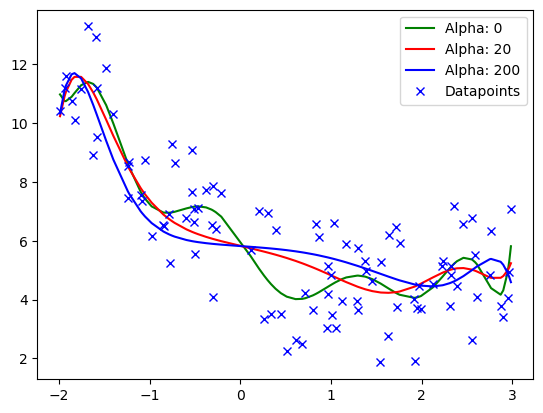

In [138]:
alphas = [0,20,200]
cs = ['g','r','b']
for alpha,c in zip(alphas,cs):
    pred = getPredict(X,y,10,alpha)
    plt.plot(sorted(X[:,0]),pred[np.argsort(X[:,0])],c,label="Alpha: {}".format(alpha))
    
plt.plot(X,y,'bx',label="Datapoints")
plt.legend()
plt.show()

In [123]:
np.argsort(X[:,0])

array([95, 80,  7, 15, 35, 47, 85, 87, 69, 70, 62, 75, 96, 38, 63, 14, 93,
       83, 40,  6, 48, 89, 74, 45, 77, 98, 72,  3, 20, 41, 76, 27, 52,  5,
       82, 16, 32,  0, 10,  2, 29, 18, 22, 79, 86, 97, 94, 73, 81, 23, 68,
        9, 51, 84, 36, 67, 43, 25, 56, 34, 53, 17, 28,  4, 19, 65, 55, 30,
       64, 57, 21, 88, 61, 78, 71, 99, 13, 58, 11, 26, 33, 92, 39, 24, 91,
       37, 46,  1, 49,  8, 31, 60, 44, 59, 90, 66, 50, 12, 54, 42],
      dtype=int64)